In [919]:
import numpy as np
import pytreenet as ptn
from copy import deepcopy

In [920]:
d = 2

In [921]:
def product_state(ttn, bond_dim=2 , physical_dim= 2):
    product_state = deepcopy(ttn)
    A = np.array([1, 0]) 
    #A = np.random.rand(2) + 1j * np.random.rand(2)
    for node_id in product_state.nodes.keys():
        n = product_state.tensors[node_id].ndim - 1
        tensor = A.reshape((1,) * n + (physical_dim,))
        T = np.pad(tensor, n*((0, bond_dim-1),) + ((0, 0),))
        product_state.tensors[node_id] = T
        product_state.nodes[node_id].link_tensor(T)  
    return product_state

In [922]:
### (0, 0): (2, 2, 2) --> (2, 2, 2, 2)

shapes = {
    (0, 0): (2, 2, 2, 2),
    (0, 1): (2, 2, 2, 2),
    (0, 2): (2, 2, 2, 2),
    (0, 3): (2, 2),
    (1, 0): (2, 2, 2),
    (1, 1): (2, 2),
    (1, 2): (2, 2, 2),
    (1, 3): (2, 2),
    (2, 0): (2, 2, 2, 2),
    (2, 1): (2, 2, 2),
    (2, 2): (2, 2, 2),
    (2, 3): (2, 2),
    (3, 0): (2, 2),
    (3, 1): (2, 2, 2),
    (3, 2): (2, 2, 2, 2),
    (3, 3): (2, 2)
}

sites = {
    (i, j): ptn.random_tensor_node(shapes[(i, j)], identifier=f"Site({i},{j})") for i in range(4) for j in range(4)
}

ttn = ptn.TreeTensorNetworkState()

ttn.add_root(sites[(0, 0)][0], sites[(0, 0)][1])

connections = [
    ((0, 0), (0, 1), 0, 0),
    ((0, 1), (1, 1), 1, 0),
    ((0, 1), (0, 2), 2, 0),
    ((0, 2), (1, 2), 1, 0),
    ((1, 2), (1, 3), 1, 0),
    ((0, 2), (0, 3), 2, 0),
    ((0, 0), (1, 0), 1, 0),
    ((1, 0), (2, 0), 1, 0),
    ((2, 0), (3, 0), 1, 0),
    ((2, 0), (2, 1), 2, 0),
    ((2, 1), (3, 1), 1, 0),
    ((3, 1), (3, 2), 1, 0),
    ((3, 2), (2, 2), 1, 0),
    ((2, 2), (2, 3), 1, 0),
    ((3, 2), (3, 3), 2, 0),
]

for (parent, child, parent_leg, child_leg) in connections:
    parent_id = f"Site({parent[0]},{parent[1]})"
    child_id = f"Site({child[0]},{child[1]})"
    ttn.add_child_to_parent(sites[child][0], sites[child][1], child_leg, parent_id, parent_leg)

ttn = product_state(ttn , bond_dim= 4, physical_dim = 2)  

nodes = {
    (i, j): (ptn.Node(tensor=ttn.tensors[f"Site({i},{j})"].conj() , identifier=f"Node({i},{j})"), ttn.tensors[f"Site({i},{j})"].conj()) for i in range(4) for j in range(4)
}

ttn.add_child_to_parent(nodes[(0,0)][0], nodes[(0,0)][1], 2, "Site(0,0)", 2)

### (0,0) : 0,1 --> 1,2

connections = [
    ((0, 0), (0, 1), 1, 0),
    ((0, 1), (1, 1), 1, 0),
    ((0, 1), (0, 2), 2, 0),
    ((0, 2), (1, 2), 1, 0),
    ((1, 2), (1, 3), 1, 0),
    ((0, 2), (0, 3), 2, 0),
    ((0, 0), (1, 0), 2, 0),
    ((1, 0), (2, 0), 1, 0),
    ((2, 0), (3, 0), 1, 0),
    ((2, 0), (2, 1), 2, 0),
    ((2, 1), (3, 1), 1, 0),
    ((3, 1), (3, 2), 1, 0),
    ((3, 2), (2, 2), 1, 0),
    ((2, 2), (2, 3), 1, 0),
    ((3, 2), (3, 3), 2, 0),
]

for (parent, child, parent_leg, child_leg) in connections:
    parent_id = f"Node({parent[0]},{parent[1]})"
    child_id = f"Node({child[0]},{child[1]})"
    ttn.add_child_to_parent(nodes[child][0], nodes[child][1], child_leg, parent_id, parent_leg)

In [923]:
### (0, 0): (2, 2, 2) --> (2, 2, 2, 2)

shapes = {
    (0, 0): (2, 2, 2),
    (0, 1): (2, 2, 2),
    (0, 2): (2, 2, 2, 2),
    (0, 3): (2, 2),
    (1, 0): (2, 2),
    (1, 1): (2, 2, 2, 2),
    (1, 2): (2, 2, 2, 2),
    (1, 3): (2, 2),
    (2, 0): (2, 2),
    (2, 1): (2, 2, 2, 2),
    (2, 2): (2, 2, 2, 2),
    (2, 3): (2, 2),
    (3, 0): (2, 2),
    (3, 1): (2, 2, 2),
    (3, 2): (2, 2, 2, 2),
    (3, 3): (2, 2)
}

sites = {
    (i, j): ptn.random_tensor_node(shapes[(i, j)], identifier=f"Site({i},{j})") for i in range(4) for j in range(4)
}

ttn = ptn.TreeTensorNetworkState()

ttn.add_root(sites[(0, 0)][0], sites[(0, 0)][1])

connections = [
    ((0, 0), (0, 1), 0, 0),
    ((0, 1), (0, 2), 1, 0),
    ((0, 2), (0, 3), 1, 0),
    ((0, 2), (1, 2), 2, 0),
    ((1, 2), (1, 3), 1, 0),
    ((1, 2), (1, 1), 2, 0),
    ((1, 1), (1, 0), 1, 0),
    ((1, 1), (2, 1), 2, 0),
    ((2, 1), (2, 0), 1, 0),
    ((2, 1), (2, 2), 2, 0),
    ((2, 2), (2, 3), 1, 0),
    ((2, 2), (3, 2), 2, 0),
    ((3, 2), (3, 3), 1, 0),
    ((3, 2), (3, 1), 2, 0),
    ((3, 1), (3, 0), 1, 0),
    ]

for (parent, child, parent_leg, child_leg) in connections:
    parent_id = f"Site({parent[0]},{parent[1]})"
    child_id = f"Site({child[0]},{child[1]})"
    ttn.add_child_to_parent(sites[child][0], sites[child][1], child_leg, parent_id, parent_leg)

ttn = product_state(ttn , bond_dim= 4, physical_dim = 2)  

nodes = {
    (i, j): (ptn.Node(tensor=ttn.tensors[f"Site({i},{j})"].conj() , identifier=f"Node({i},{j})"), ttn.tensors[f"Site({i},{j})"].conj()) for i in range(4) for j in range(4)
}

ttn.add_child_to_parent(nodes[(0,0)][0], nodes[(0,0)][1], 1, "Site(0,0)", 1)

### (0,0) : 0,1 --> 1,2

connections = [
    ((0, 0), (0, 1), 1, 0),
    ((0, 1), (0, 2), 1, 0),
    ((0, 2), (0, 3), 1, 0),
    ((0, 2), (1, 2), 2, 0),
    ((1, 2), (1, 3), 1, 0),
    ((1, 2), (1, 1), 2, 0),
    ((1, 1), (1, 0), 1, 0),
    ((1, 1), (2, 1), 2, 0),
    ((2, 1), (2, 0), 1, 0),
    ((2, 1), (2, 2), 2, 0),
    ((2, 2), (2, 3), 1, 0),
    ((2, 2), (3, 2), 2, 0),
    ((3, 2), (3, 3), 1, 0),
    ((3, 2), (3, 1), 2, 0),
    ((3, 1), (3, 0), 1, 0),
    ]

for (parent, child, parent_leg, child_leg) in connections:
    parent_id = f"Node({parent[0]},{parent[1]})"
    child_id = f"Node({child[0]},{child[1]})"
    ttn.add_child_to_parent(nodes[child][0], nodes[child][1], child_leg, parent_id, parent_leg)

In [924]:
shapes = {
    (0, 0): (2, 2, 2, d),
    (0, 1): (2, 2, d),
    (0, 2): (2, 2, d),
    (1, 0): (2, 2, d),
    (1, 1): (2, d),
    (1, 2): (2, d),
    (2, 0): (2, 2, d),
    (2, 1): (2, 2, 2, d),
    (2, 2): (2, d)
}


sites = {
    (i, j): ptn.random_tensor_node(shapes[(i, j)], identifier=f"Site({i},{j})") for i in range(3) for j in range(3)
}

ttn = ptn.TreeTensorNetworkState()

ttn.add_root(sites[(0, 0)][0], sites[(0, 0)][1])

connections = [
    ((0, 0), (0, 1), 0, 0),
    ((0, 1), (0, 2), 1, 0),
    ((0, 2), (1, 2), 1, 0),
    ((0, 0), (1, 0), 1, 0),
    ((1, 0), (2, 0), 1, 0),
    ((2, 0), (2, 1), 1, 0),
    ((2, 1), (1, 1), 1, 0),
    ((2, 1), (2, 2), 2, 0)]


for (parent, child, parent_leg, child_leg) in connections:
    parent_id = f"Site({parent[0]},{parent[1]})"
    child_id = f"Site({child[0]},{child[1]})"
    ttn.add_child_to_parent(sites[child][0], sites[child][1], child_leg, parent_id, parent_leg)

ttn = product_state(ttn , bond_dim= 4, physical_dim = d)

nodes = {
    (i, j): (ptn.Node(tensor=ttn.tensors[f"Site({i},{j})"].conj() , identifier=f"Node({i},{j})"), ttn.tensors[f"Site({i},{j})"].conj()) for i in range(3) for j in range(3)
}

ttn.add_child_to_parent(nodes[(0,0)][0], nodes[(0,0)][1], 2, "Site(0,0)", 2)

connections = [
    ((0, 0), (0, 1), 1, 0),
    ((0, 1), (0, 2), 1, 0),
    ((0, 2), (1, 2), 1, 0),
    ((0, 0), (1, 0), 2, 0),
    ((1, 0), (2, 0), 1, 0),
    ((2, 0), (2, 1), 1, 0),
    ((2, 1), (1, 1), 1, 0),
    ((2, 1), (2, 2), 2, 0),
]

for (parent, child, parent_leg, child_leg) in connections:
    parent_id = f"Node({parent[0]},{parent[1]})"
    child_id = f"Node({child[0]},{child[1]})"
    ttn.add_child_to_parent(nodes[child][0], nodes[child][1], child_leg, parent_id, parent_leg)

In [925]:
def get_neighbors_periodic_in_legs(x, y, Lx, Ly):
  neighbors = []
  
  # Right neighbor (with periodic boundary)
  right_x = (x + 1) % Lx
  neighbors.append((f"Site({right_x},{y})"))
  
  # Up neighbor (with periodic boundary)
  up_y = (y + 1) % Ly
  neighbors.append((f"Site({x},{up_y})"))
  
  return neighbors

def get_neighbors_periodic_out_legs(x, y, Lx, Ly):
    neighbors = []
    
    # Right neighbor (with periodic boundary)
    right_x = (x + 1) % Lx
    neighbors.append((f"Node({right_x},{y})"))
    
    # Up neighbor (with periodic boundary)
    up_y = (y + 1) % Ly
    neighbors.append((f"Node({x},{up_y})"))
    
    return neighbors  



In [926]:
def Anisotropic_Heisenberg_ham(J_x, J_y, J_z, h_z, Lx, Ly):
    # Get the Pauli matrices
    X, Y, Z = ptn.pauli_matrices()
    
    # Create a conversion dictionary for the operators
    conversion_dict = {
        "X": X,
        "J_x * X": J_x * X,
        "Y": Y,
        "J_y * Y": J_y * Y,
        "Z": Z,
        "J_z * Z": J_z * Z,
        "I2": np.eye(2),
        "h_z * Z": h_z * Z
    }
    
    terms = []
    
    for x in range(Lx):
        for y in range(Ly):
            current_site = f"Site({x},{y})"
            neighbors = get_neighbors_periodic_in_legs(x, y, Lx, Ly)
            
            for neighbor in neighbors:
                terms.append(ptn.TensorProduct({current_site: "X", neighbor: "J_x * X"}))
                terms.append(ptn.TensorProduct({current_site: "Y", neighbor: "J_y * Y"}))
                terms.append(ptn.TensorProduct({current_site: "Z", neighbor: "J_z * Z"}))               

    
    # On-site magnetic field terms
    for x in range(Lx):
        for y in range(Ly):
            current_site = f"Site({x},{y})"
            terms.append(ptn.TensorProduct({current_site: "h_z * Z"}))
    
    return ptn.Hamiltonian(terms, conversion_dict)

In [927]:
def Liouville_Heisenberg(Lx, Ly, J_x, J_y, J_z, h_z, L, J):
    # Get the Pauli matrices
    X, Y, Z = ptn.pauli_matrices()
    L = L.T
    # Create the conversion dictionary for the Hamiltonian.
    conversion_dict = {
        "-iJ_x * X": -1j*J_x * (X),
        "X":                   (X),
        "-iJ_Y * Y": -1j*J_y * (Y),
        "Y":                   (Y),
        "-iJ_z * Z": -1j*J_z * (Z),
        "Z":                   (Z),
        "I2":          np.eye(2),
    }
    
    terms = []
    
    for x in range(Lx):
        for y in range(Ly):
            current_site = f"Site({x},{y})"
            neighbors = get_neighbors_periodic_in_legs(x, y, Lx, Ly)
            
            for neighbor in neighbors:
                terms.append(ptn.TensorProduct({current_site: "-iJ_x * X", neighbor: "X"}))
                terms.append(ptn.TensorProduct({current_site: "-iJ_Y * Y", neighbor: "Y"}))
                terms.append(ptn.TensorProduct({current_site: "-iJ_z * Z", neighbor: "Z"}))     
                #terms.append(ptn.TensorProduct({neighbor: "-iJ_x * X",current_site : "X"}))
                #terms.append(ptn.TensorProduct({neighbor: "-iJ_Y * Y",current_site : "Y"}))
                #terms.append(ptn.TensorProduct({neighbor: "-iJ_z * Z",current_site : "Z"}))  

    H1 = ptn.Hamiltonian(terms, conversion_dict)
    
    # H.T = H 
    
    # Create the conversion dictionary for the Hamiltonian
    conversion_dict = {
        "iJ_x * X.T": 1j*J_x * (X.T),
        "X.T":                 (X.T),
        "iJ_Y * Y.T": 1j*J_y * (Y.T),
        "Y.T":                 (Y.T),
        "iJ_z * Z.T": 1j*J_z * (Z.T),
        "Z.T":                 (Z.T),
        "I2":              np.eye(2),
    }
    
    terms = []
    
    # Hopping terms for the transpose
    for x in range(Lx):
        for y in range(Ly):
            current_site = f"Node({x},{y})"
            neighbors = get_neighbors_periodic_out_legs(x, y, Lx, Ly)
            
            for neighbor in neighbors:
                terms.append(ptn.TensorProduct({current_site: "iJ_x * X.T", neighbor: "X.T"}))
                terms.append(ptn.TensorProduct({current_site: "iJ_Y * Y.T", neighbor: "Y.T"}))
                terms.append(ptn.TensorProduct({current_site: "iJ_z * Z.T", neighbor: "Z.T"}))                
                #terms.append(ptn.TensorProduct({neighbor: "iJ_x * X.T", current_site: "X.T"}))
                #terms.append(ptn.TensorProduct({neighbor: "iJ_Y * Y.T", current_site: "Y.T"}))
                #terms.append(ptn.TensorProduct({neighbor: "iJ_z * Z.T", current_site: "Z.T"})) 
    
    H2 = ptn.Hamiltonian(terms, conversion_dict)    
    H1.__add__(H2)
    
    
    conversion_dict = {
        "L": J * L,
        "L^dagger.T":  J * L.conj(),
        "-1/2 (L^dagger @ L)": -1/2 * J * (L.conj().T @ L),
        "-1/2 (L^dagger @ L).T": -1/2 * J * (L.conj().T @ L).T
    }

    terms = []
    for x in range(Lx):
        for y in range(Ly):
            out_site = f"Node({x},{y})"
            in_site = f"Site({x},{y})"
            #terms.append(ptn.TensorProduct({in_site: "L"}))
            #terms.append(ptn.TensorProduct({out_site: "L^dagger.T"}))
            terms.append(ptn.TensorProduct({in_site: "L" , out_site: "L^dagger.T"}))
            terms.append(ptn.TensorProduct({in_site: "-1/2 (L^dagger @ L)"}))
            terms.append(ptn.TensorProduct({out_site: "-1/2 (L^dagger @ L).T"}))

    H3 = ptn.Hamiltonian(terms, conversion_dict)
    H1.__add__(H3)
    
    return H1

In [928]:
def Unitary(Lx, Ly, J_x, J_y, J_z, h_z):
    # Get the Pauli matrices
    X, Y, Z = ptn.pauli_matrices()
    
    # Create the conversion dictionary for the Hamiltonian
    conversion_dict = {
        "-i * X": -1j* X,
        "J_x * X": J_x * X,
        "-i * Y": -1j* Y,
        "J_y * Y": J_y * Y,
        "-i * Z": -1j* Z,
        "J_z * Z": J_z * Z,
        "I2": np.eye(2),
        "-i * h_z * Z": -1j* h_z * Z
    }
    
    terms = []
    
    for x in range(Lx):
        for y in range(Ly):
            current_site = f"Site({x},{y})"
            neighbors = get_neighbors_periodic_in_legs(x, y, Lx, Ly)
            
            for neighbor in neighbors:
                terms.append(ptn.TensorProduct({current_site: "-i * X", neighbor: "J_x * X"}))
                terms.append(ptn.TensorProduct({current_site: "-i * Y", neighbor: "J_y * Y"}))
                terms.append(ptn.TensorProduct({current_site: "-i * Z", neighbor: "J_z * Z"}))       

    
    # On-site magnetic field terms
    for x in range(Lx):
        for y in range(Ly):
            current_site = f"Site({x},{y})"
            terms.append(ptn.TensorProduct({current_site: "-i * h_z * Z"}))

    H1 = ptn.Hamiltonian(terms, conversion_dict)
    
    # H.T = H 
    
    # Create the conversion dictionary for the Hamiltonian
    conversion_dict = {
        "i * X": 1j* X,
        "J_x * X": J_x * X,
        "i * Y": 1j* Y,
        "J_y * Y": J_y * Y,
        "i * Z": 1j* Z,
        "J_z * Z": J_z * Z,
        "I2": np.eye(2),
        "i * h_z * Z": 1j* h_z * Z
    }
    
    terms = []
    
    # Hopping terms for the transpose
    for x in range(Lx):
        for y in range(Ly):
            current_site = f"Node({x},{y})"
            neighbors = get_neighbors_periodic_out_legs(x, y, Lx, Ly)
            
            for neighbor in neighbors:
                terms.append(ptn.TensorProduct({current_site: "i * X", neighbor: "J_x * X"}))
                terms.append(ptn.TensorProduct({current_site: "i * Y", neighbor: "J_y * Y"}))
                terms.append(ptn.TensorProduct({current_site: "i * Z", neighbor: "J_z * Z"})) 


    # On-site magnetic field terms
    for x in range(Lx):
        for y in range(Ly):
            current_site = f"Node({x},{y})"
            terms.append(ptn.TensorProduct({current_site: "i * h_z * Z"}))
    
    H2 = ptn.Hamiltonian(terms, conversion_dict)    
    H1.__add__(H2)
    
    return H1    
    

In [929]:
def Magnetization_op_total(Lx, Ly):
    # Get the Pauli matrices
    X, Y, Z = ptn.pauli_matrices()
    
    # Create a conversion dictionary for the operators
    conversion_dict = {
        "X": X ,
        "Y": Y,
        "Z": Z,
        "I2": np.eye(2)}
    terms = []
    for x in range(Lx):
        for y in range(Ly):
            current_site = f"Site({x},{y})"
            terms.append(ptn.TensorProduct({current_site: "Z"}))  # Using Z for magnetization

    return ptn.Hamiltonian(terms, conversion_dict)

In [930]:
Lx =  3
Ly  = 3
J_x = 0.9
J_y = 1 #(1.8)
J_z = 1
h_z = 0


# TTNO : Hamiltonian acting on in_legs
H1 = Anisotropic_Heisenberg_ham(J_x, J_y, J_z, h_z, Lx, Ly)
H1 = H1.pad_with_identities(ttn, symbolic= True)
H = ptn.TTNO.from_hamiltonian(H1, ttn)

# TTNO : Liouville operator 
X , Y , Z = ptn.pauli_matrices()
L = (X - 1j * Y) / 2
J = 1
H1 = Liouville_Heisenberg(Lx, Ly, J_x, J_y, J_z, h_z, L, J)
H1 = H1.pad_with_identities(ttn , symbolic= True)
L_fancy = ptn.TTNO.from_hamiltonian(H1, ttn)

# TTNO : Unitary operator
H1 = Unitary(Lx, Ly, J_x, J_y, J_z, h_z)
H1 = H1.pad_with_identities(ttn, symbolic= True)
U = ptn.TTNO.from_hamiltonian(H1, ttn)

M = Magnetization_op_total(Lx, Ly)
M = M.pad_with_identities(ttn, symbolic= True)
M = ptn.TTNO.from_hamiltonian(M, ttn)

# ttn = ptn.normalize_ttn_Lindblad_4(ttn , 'Node(2,3)')
I = ptn.TTNO.Identity(ttn)
print(ttn.operator_expectation_value_Lindblad(I))
print(ttn.operator_expectation_value_Lindblad(M) / ttn.operator_expectation_value_Lindblad(I))

(1+0j)
(9+0j)


In [931]:
# Config : Lindblad = True
# time_evolve with exponent = hamiltonian * time_difference
# evaluate_operator with operator_expectation_value_Lindblad(operator)
# normalize_ttn_Lindblad after each run_one_time_step_ex

tdvp_ex1 = ptn.SecondOrderOneSiteTDVP(initial_state = ttn,
                                     hamiltonian = L_fancy,
                                     time_step_size = 0.01,
                                     final_time = 4,
                                     operators = M,
                                     num_vecs = 3,
                                     tau = 1e-3,
                                     SVDParameters = ptn.SVDParameters(max_bond_dim = np.inf , rel_tol= -np.inf , total_tol = -np.inf),
                                     expansion_steps = 50,
                                     t3n_dict= {'Site(0,0)': 'Site(1,0)',
                                                'Site(2,1)': 'Site(1,1)',
                                                'Node(0,0)': 'Node(1,0)',
                                                'Node(2,1)': 'Node(1,1)'},

                                     Lanczos_threshold = np.inf,
                                     k_fraction = 0.2, 
                                     validity_fraction = 1, 
                                     increase_fraction = 0.3,
                                     max_iter = 1, 

                                     initial_tol= 1e-19,
                                     tol_step= 50,
                                     rel_tot_bond = 30,
                                     max_bond= 220,
                                     norm_tol = 0,
                                     KrylovBasisMode = ptn.KrylovBasisMode.apply_1st_order_expansion,
                                     config = ptn.TTNTimeEvolutionConfig(record_bond_dim=True,
                                                                         Lindblad = True,
                                                                         T3NS= False) )

In [932]:
v

NameError: name 'v' is not defined

In [121]:
# Config : Lindblad = True
# time_evolve with exponent = hamiltonian * time_difference
# evaluate_operator with operator_expectation_value_Lindblad(operator)
# normalize_ttn_Lindblad after each run_one_time_step_ex

tdvp_ex1 = ptn.SecondOrderOneSiteTDVP(initial_state = ttn,
                                     hamiltonian = L_fancy,
                                     time_step_size = 0.001,
                                     final_time = 4,
                                     operators = M,
                                     num_vecs = 3,
                                     tau = 1e-3,
                                     SVDParameters = ptn.SVDParameters(max_bond_dim = np.inf , rel_tol= -np.inf , total_tol = -np.inf),
                                     expansion_steps = 100,
                                     t3n_dict = {'Site(0,2)': 'Site(0,1)',
                                                'Site(1,2)': 'Site(1,1)',
                                                'Site(1,1)': 'Site(2,1)',
                                                'Site(2,1)': 'Site(2,2)',
                                                'Site(2,2)': 'Site(2,1)',
                                                'Site(3,2)': 'Site(3,3)',

                                                'Node(0,2)': 'Node(0,1)',
                                                'Node(1,2)': 'Node(1,1)',
                                                'Node(1,1)': 'Node(2,1)',
                                                'Node(2,1)': 'Node(2,2)',
                                                'Node(2,2)': 'Node(2,1)',
                                                'Node(3,2)': 'Node(3,3)'},

                                     Lanczos_threshold = np.inf,
                                     k_fraction = 0.2, 
                                     validity_fraction = 1, 
                                     increase_fraction = 0.3,
                                     max_iter = 1, 

                                     initial_tol= 1e-16,
                                     tol_step= 5,
                                     rel_tot_bond = 30,
                                     max_bond= 220,
                                     norm_tol = 0,
                                     KrylovBasisMode = ptn.KrylovBasisMode.apply_1st_order_expansion,
                                     config = ptn.TTNTimeEvolutionConfig(record_bond_dim=True,
                                                                         Lindblad = True,
                                                                         T3NS= False) )

In [122]:
c

NameError: name 'c' is not defined

In [21]:
# Config : Lindblad = True
# time_evolve with exponent = hamiltonian * time_difference
# evaluate_operator with operator_expectation_value_Lindblad(operator)
# normalize_ttn_Lindblad after each run_one_time_step_ex

tdvp_ex1 = ptn.SecondOrderOneSiteTDVP(initial_state = ttn,
                                     hamiltonian = L_fancy,
                                     time_step_size = 0.001,
                                     final_time = 4,
                                     operators = M,
                                     num_vecs = 3,
                                     tau = 1e-3,
                                     SVDParameters = ptn.SVDParameters(max_bond_dim = np.inf , rel_tol= -np.inf , total_tol = -np.inf),
                                     expansion_steps = 200,
                                     t3n_dict = {'Site(0,0)': 'Site(1,0)',
                                                'Site(0,1)': 'Site(1,1)',
                                                'Site(0,2)': 'Site(0,3)',
                                                'Site(2,0)': 'Site(2,1)',
                                                'Site(3,2)': 'Site(3,3)',
                                                'Node(0,0)': 'Node(1,0)',
                                                'Node(0,1)': 'Node(1,1)',
                                                'Node(0,2)': 'Node(0,3)',
                                                'Node(2,0)': 'Node(2,1)',
                                                'Node(3,2)': 'Node(3,3)'},

                                     Lanczos_threshold = np.inf,
                                     k_fraction = 0.2, 
                                     validity_fraction = 1, 
                                     increase_fraction = 0.3,
                                     max_iter = 1, 

                                     initial_tol= 1e-17,
                                     tol_step= 10,
                                     rel_tot_bond = 40,
                                     max_bond= 220,
                                     norm_tol = 0,
                                     KrylovBasisMode = ptn.KrylovBasisMode.apply_1st_order_expansion,
                                     config = ptn.TTNTimeEvolutionConfig(record_bond_dim=True,
                                                                         Lindblad = True,
                                                                         T3NS= False) )

In [98]:
stop

NameError: name 'stop' is not defined

In [915]:
tdvp_ex1.run_ex(evaluation_time=2)


  0%|          | 1/401 [00:00<01:01,  6.53it/s]

M : (9+0j)


  1%|          | 3/401 [00:00<00:55,  7.23it/s]

M : (8.999777527779584+9.243641206494384e-07j)


  1%|          | 5/401 [00:00<00:54,  7.26it/s]

M : (8.9990459252594+3.66735656998458e-06j)


  1%|▏         | 6/401 [00:00<00:54,  7.31it/s]

M : (8.99780437501646+9.334457370552692e-06j)


  2%|▏         | 9/401 [00:01<00:56,  6.96it/s]

M : (8.996081650803738+1.8133365377272353e-05j)


  3%|▎         | 11/401 [00:01<00:56,  6.94it/s]

M : (8.993924153341117+2.990890157992986e-05j)


  3%|▎         | 13/401 [00:02<01:06,  5.81it/s]

M : (8.991389149531697+4.418590647160953e-05j)


  4%|▎         | 15/401 [00:02<01:10,  5.50it/s]

M : (8.988536839611438+6.025156465890493e-05j)


  4%|▍         | 17/401 [00:02<01:11,  5.39it/s]

M : (8.985422090090422+7.727118816396358e-05j)


  5%|▍         | 19/401 [00:03<01:04,  5.91it/s]

M : (8.982086863131597+9.441496848728352e-05j)


  5%|▌         | 21/401 [00:03<01:07,  5.65it/s]

M : (8.978554285335667+0.0001109786035940253j)


  6%|▌         | 23/401 [00:03<01:20,  4.71it/s]

M : (8.97482498375886+0.00012646549817016062j)


  6%|▌         | 25/401 [00:04<01:07,  5.55it/s]

M : (8.97087594609493+0.00014061844367511267j)


  7%|▋         | 27/401 [00:04<00:56,  6.57it/s]

M : (8.966661812549898+0.00015339383380388156j)


  7%|▋         | 29/401 [00:04<00:53,  6.94it/s]

M : (8.962118229776848+0.00016488018272060745j)


  8%|▊         | 31/401 [00:05<00:51,  7.12it/s]

M : (8.957166665554627+0.00017518396504915236j)


  8%|▊         | 33/401 [00:05<00:51,  7.09it/s]

M : (8.951719836112426+0.00018434927164944005j)


  9%|▊         | 35/401 [00:05<00:48,  7.57it/s]

M : (8.945686707088944+0.00019242288419286582j)


  9%|▉         | 37/401 [00:05<00:47,  7.72it/s]

M : (8.938977618605694+0.00019961083824654194j)


 10%|▉         | 39/401 [00:06<00:45,  7.95it/s]

M : (8.931518595791932+0.00020552826423246817j)


 10%|█         | 41/401 [00:06<00:52,  6.81it/s]

M : (8.923271169689341+0.00020894415656133678j)


 11%|█         | 43/401 [00:06<00:58,  6.13it/s]

M : (8.91421682084891+0.00021112539138657766j)


 11%|█         | 45/401 [00:07<00:54,  6.52it/s]

M : (8.904346881806648+0.0002141798636890598j)


 12%|█▏        | 47/401 [00:07<01:05,  5.43it/s]

M : (8.893666865822828+0.00021862977979749345j)


 12%|█▏        | 49/401 [00:07<01:03,  5.50it/s]

M : (8.882193371882417+0.00022400932080950123j)


 12%|█▏        | 50/401 [00:08<01:04,  5.47it/s]

M : (8.869949853333107+0.00022954468230561347j)
SVD MAX : 8
tol : 1e-19


 13%|█▎        | 51/401 [00:10<04:55,  1.19it/s]

expanded_dim T3NS: 23
T3NS: 80 ---> 103
expanded_dim TTN: 23
TTN: 56 ---> 79


 13%|█▎        | 52/401 [00:10<04:03,  1.44it/s]

M : (8.857026539405442+0.00023948878881575593j)


 13%|█▎        | 54/401 [00:11<03:05,  1.88it/s]

M : (8.843432176357522+0.00024804546320964627j)


 14%|█▍        | 56/401 [00:12<02:31,  2.28it/s]

M : (8.829039608522214+0.00025722752978439773j)


 14%|█▍        | 58/401 [00:12<01:59,  2.86it/s]

M : (8.81387576978665+0.0002660133879725625j)


 15%|█▍        | 60/401 [00:13<01:41,  3.35it/s]

M : (8.797963456020828+0.0002742609959589353j)


 15%|█▌        | 62/401 [00:13<01:32,  3.65it/s]

M : (8.781317481401494+0.00028239768851039885j)


 16%|█▌        | 64/401 [00:14<01:49,  3.08it/s]

M : (8.76393906230976+0.000291844789128183j)


 16%|█▋        | 66/401 [00:15<01:37,  3.45it/s]

M : (8.745812606832581+0.00030485780225611556j)


 17%|█▋        | 68/401 [00:15<01:36,  3.44it/s]

M : (8.72690652936772+0.0003225312265848428j)


 17%|█▋        | 70/401 [00:16<01:34,  3.51it/s]

M : (8.707173926478626+0.0003449294653832027j)


 18%|█▊        | 72/401 [00:16<01:32,  3.54it/s]

M : (8.686551048674486+0.0003755842474412621j)


 18%|█▊        | 74/401 [00:17<01:33,  3.49it/s]

M : (8.66496177705791+0.0004224309068977098j)


 19%|█▉        | 76/401 [00:17<01:34,  3.45it/s]

M : (8.642327731516147+0.0004885063604862438j)


 19%|█▉        | 78/401 [00:18<01:29,  3.62it/s]

M : (8.618571721100244+0.0005628326442264309j)


 20%|█▉        | 80/401 [00:18<01:26,  3.72it/s]

M : (8.59361640541374+0.0006308225420913691j)


 20%|██        | 82/401 [00:19<01:26,  3.70it/s]

M : (8.567389420788674+0.000682651521793647j)


 21%|██        | 84/401 [00:20<01:24,  3.77it/s]

M : (8.539825836123775+0.0007105532966532032j)


 21%|██▏       | 86/401 [00:20<01:22,  3.81it/s]

M : (8.510875044391536+0.0007061832016175777j)


 22%|██▏       | 88/401 [00:21<01:24,  3.72it/s]

M : (8.480525389602375+0.0006792044408964047j)


 22%|██▏       | 90/401 [00:21<01:25,  3.63it/s]

M : (8.448799016692226+0.0006775915114985712j)


 23%|██▎       | 92/401 [00:22<01:33,  3.32it/s]

M : (8.415714311069213+0.0007409640000635436j)


 23%|██▎       | 94/401 [00:22<01:30,  3.40it/s]

M : (8.381279887729054+0.0008673985033451005j)


 24%|██▍       | 96/401 [00:23<01:24,  3.62it/s]

M : (8.345502875595875+0.0010290904192873191j)


 24%|██▍       | 98/401 [00:23<01:23,  3.62it/s]

M : (8.30839590069693+0.0011910025685775655j)


 25%|██▍       | 100/401 [00:24<01:24,  3.56it/s]

M : (8.26997401463354+0.0013173154286534228j)


 25%|██▌       | 101/401 [00:24<01:27,  3.44it/s]

SVD MAX : 12
tol : 1e-19
expanded_dim_tot : 31
1) tol 4.9999999999999996e-18


 25%|██▌       | 102/401 [00:34<15:53,  3.19s/it]

2) expanded_dim : 11
expanded_dim T3NS: 11
T3NS: 111 ---> 122
expanded_dim TTN: 11
TTN: 79 ---> 90
M : (8.230247458281243+0.0013731356616958636j)


 26%|██▌       | 104/401 [00:35<09:02,  1.83s/it]

M : (8.189784356782349+0.0016210763131252201j)


 26%|██▋       | 106/401 [00:36<05:45,  1.17s/it]

M : (8.148477240717742+0.0016926330870028219j)


 27%|██▋       | 108/401 [00:37<04:05,  1.19it/s]

M : (8.106093245502162+0.0017759977582883617j)


 27%|██▋       | 110/401 [00:38<03:13,  1.50it/s]

M : (8.062579407808844+0.0018483756001233184j)


 28%|██▊       | 112/401 [00:40<02:49,  1.70it/s]

M : (8.017862223205968+0.0018717811466504267j)


 28%|██▊       | 114/401 [00:41<02:37,  1.82it/s]

M : (7.97183267307572+0.0017665862162200279j)


 29%|██▉       | 116/401 [00:42<02:35,  1.83it/s]

M : (7.924331514038437+0.0013682732485823198j)


 29%|██▉       | 118/401 [00:43<02:32,  1.86it/s]

M : (7.875184158711328+0.0004919667028551094j)


 30%|██▉       | 120/401 [00:44<02:29,  1.87it/s]

M : (7.824337141290199-0.0007548035418509867j)


 30%|███       | 122/401 [00:45<02:28,  1.88it/s]

M : (7.771852411844165-0.001965931119094856j)


 31%|███       | 124/401 [00:46<02:25,  1.91it/s]

M : (7.717900237099335-0.002914798102465421j)


 31%|███▏      | 126/401 [00:47<02:20,  1.96it/s]

M : (7.6629115606264016-0.003575152754057861j)


 32%|███▏      | 128/401 [00:48<02:19,  1.96it/s]

M : (7.607266878490171-0.0039237311850599j)


 32%|███▏      | 130/401 [00:49<02:17,  1.97it/s]

M : (7.55110189124036-0.003961392786675595j)


 33%|███▎      | 132/401 [00:50<02:15,  1.98it/s]

M : (7.494504793203426-0.0037520914613547274j)


 33%|███▎      | 134/401 [00:51<02:21,  1.89it/s]

M : (7.4376452207672665-0.0033823850624695234j)


 34%|███▍      | 136/401 [00:52<02:20,  1.89it/s]

M : (7.3807490951423-0.0029345369792430124j)


 34%|███▍      | 138/401 [00:53<02:16,  1.93it/s]

M : (7.32403420718936-0.002483293561255188j)


 35%|███▍      | 140/401 [00:54<02:16,  1.92it/s]

M : (7.267660653112912-0.0020985025020784477j)


 35%|███▌      | 142/401 [00:55<02:12,  1.95it/s]

M : (7.211713186926431-0.0018450549506911465j)


 36%|███▌      | 144/401 [00:56<02:14,  1.91it/s]

M : (7.156221731756719-0.001768568810007893j)


 36%|███▋      | 146/401 [00:57<02:14,  1.90it/s]

M : (7.101207962716738-0.0018479960809638044j)


 37%|███▋      | 148/401 [00:58<02:09,  1.96it/s]

M : (7.046712336891-0.0018951121540889933j)


 37%|███▋      | 150/401 [00:59<02:08,  1.95it/s]

M : (6.992710460095397-0.0014154727629370723j)


 38%|███▊      | 152/401 [01:00<02:08,  1.95it/s]

M : (6.938829752662157+0.0004438170816833759j)
SVD MAX : 14
tol : 4.9999999999999996e-18


 38%|███▊      | 153/401 [01:08<10:52,  2.63s/it]

expanded_dim T3NS: 40
T3NS: 126 ---> 166
expanded_dim TTN: 30
TTN: 90 ---> 120


 38%|███▊      | 154/401 [01:13<13:44,  3.34s/it]

M : (6.863164358446996+0.001021423641218202j)


 39%|███▉      | 156/401 [01:23<17:06,  4.19s/it]

M : (6.771523004369663-0.0005091411264608345j)


 39%|███▉      | 158/401 [01:34<19:56,  4.92s/it]

M : (6.676845574330745-0.0005814359755225044j)


 40%|███▉      | 160/401 [01:46<21:28,  5.35s/it]

M : (6.578173364647424+0.0010138105788271127j)


 40%|████      | 162/401 [01:58<22:29,  5.65s/it]

M : (6.4750586086976+0.0045121511940131994j)


 41%|████      | 164/401 [02:08<21:35,  5.47s/it]

M : (6.367073133193942+0.010215197389371659j)


 41%|████▏     | 166/401 [02:22<24:31,  6.26s/it]

M : (6.2538788565163355+0.01836986117154674j)


 42%|████▏     | 167/401 [02:29<03:29,  1.12it/s]


KeyboardInterrupt: 

In [916]:
times = tdvp_ex1.times()
tdvp_ex1.operator_results()[0]

array([9.        +0.00000000e+00j, 8.99977753+9.24364121e-07j,
       8.99904593+3.66735657e-06j, 8.99780438+9.33445737e-06j,
       8.99608165+1.81333654e-05j, 8.99392415+2.99089016e-05j,
       8.99138915+4.41859065e-05j, 8.98853684+6.02515647e-05j,
       8.98542209+7.72711882e-05j, 8.98208686+9.44149685e-05j,
       8.97855429+1.10978604e-04j, 8.97482498+1.26465498e-04j,
       8.97087595+1.40618444e-04j, 8.96666181+1.53393834e-04j,
       8.96211823+1.64880183e-04j, 8.95716667+1.75183965e-04j,
       8.95171984+1.84349272e-04j, 8.94568671+1.92422884e-04j,
       8.93897762+1.99610838e-04j, 8.9315186 +2.05528264e-04j,
       8.92327117+2.08944157e-04j, 8.91421682+2.11125391e-04j,
       8.90434688+2.14179864e-04j, 8.89366687+2.18629780e-04j,
       8.88219337+2.24009321e-04j, 8.86994985+2.29544682e-04j,
       8.85702654+2.39488789e-04j, 8.84343218+2.48045463e-04j,
       8.82903961+2.57227530e-04j, 8.81387577+2.66013388e-04j,
       8.79796346+2.74260996e-04j, 8.78131748+2.8239768

In [883]:
from qutip import *
import numpy as np

# Define coupling constants for anisotropy
Jx = 0.9  # Coupling in x-direction
Jy = 1  # Coupling in y-direction
Jz = 1  # Coupling in z-direction

gamma_relax = 1 # Relaxation rate
# gamma_dephase = 1  # Dephasing rate

# Lattice dimensions
Nx = 3  # Number of sites along x-direction
Ny = 3  # Number of sites along y-direction
N = Nx * Ny  # Total number of sites

# Precompute the spin operators for each site
sx_list = []
sy_list = []
sz_list = []
sigmam_list = []

si = qeye(2)  # Identity operator for a single qubit
for n in range(N):
  # List of identity operators for all sites
  op_list = [si] * N
  # Sx operator at site n
  op_list[n] = sigmax()
  sx = tensor(op_list)
  sx_list.append(sx)
  
  # Sy operator at site n
  op_list[n] = sigmay()
  sy = tensor(op_list)
  sy_list.append(sy)
  
  # Sz operator at site n
  op_list[n] = sigmaz()
  sz = tensor(op_list)
  sz_list.append(sz)
  
  # S- (lowering) operator at site n
  op_list[n] = sigmam()
  sigmam_op = tensor(op_list)
  sigmam_list.append(sigmam_op)

# Function to map 2D lattice coordinates (i, j) to a site index
def site(i, j):
  """Return the site index for coordinates (i, j), with periodic boundaries."""
  return (i % Nx) + (j % Ny) * Nx

# Initialize the Hamiltonian
H = 0

# Build the Hamiltonian by summing over nearest neighbors with periodic boundary conditions
for i in range(Nx):
  for j in range(Ny):
      n = site(i, j)  # Current site index
      # Right neighbor (periodic boundary)
      n_right = site(i + 1, j)
      # Interaction terms with the right neighbor
      H += Jx * sx_list[n] * sx_list[n_right]
      H += Jy * sy_list[n] * sy_list[n_right]
      H += Jz * sz_list[n] * sz_list[n_right]
      
      # Up neighbor (periodic boundary)
      n_up = site(i, j + 1)
      # Interaction terms with the up neighbor
      H += Jx * sx_list[n] * sx_list[n_up]
      H += Jy * sy_list[n] * sy_list[n_up]
      H += Jz * sz_list[n] * sz_list[n_up]
      

# Option 1: All spins up |000...0> (Eigenstate of Sz_total)
psi0 = tensor([basis(2, 0) for _ in range(N)]).unit()

# Option 2: All spins in superposition |+⟩ = (|0⟩ + |1⟩)/sqrt(2)
# psi0 = tensor([(basis(2, 0) + basis(2, 1)).unit() for _ in range(N)])

# Option 3: Half spins excited |111...1000...0>
# psi0 = tensor([basis(2, 1) if n < N//2 else basis(2, 0) for n in range(N)]).unit()

tlist = np.linspace(0, 10, 200)


# Define collapse operators (for the Lindblad equation)
# For example, include relaxation and dephasing at each site


c_ops = []

for n in range(N):
  # a. Relaxation (spin flip down) using lowering operator S-
  c_ops.append(np.sqrt(gamma_relax) * sigmam_list[n])
  
  # b. Optional: Dephasing using Sz operator
  # Uncomment the following lines if you wish to include dephasing
  # c_ops.append(np.sqrt(gamma_dephase) * sz_list[n])

# Time points where we want the solution
total_time = 4.0  # Total time in seconds
time_step = 0.02  # Time step in seconds

# Create the time list
tlist = np.arange(0, total_time + time_step, time_step)  # Include the endpoint


# Observables to calculate - for instance, total magnetization in z-direction
sz_total = sum(sz_list)

# Solve the master equation
result = mesolve(
  H,        # Hamiltonian
  psi0,     # Initial state
  tlist,    # Time list
  c_ops,    # Collapse operators
  [sz_total]  # List of observables
  # , [sz_first, sz_last]  # Uncomment to track individual spins
)

# Extract expectation values
magnetization_z = result.expect[0]


c:\Users\edpou\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\edpou\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


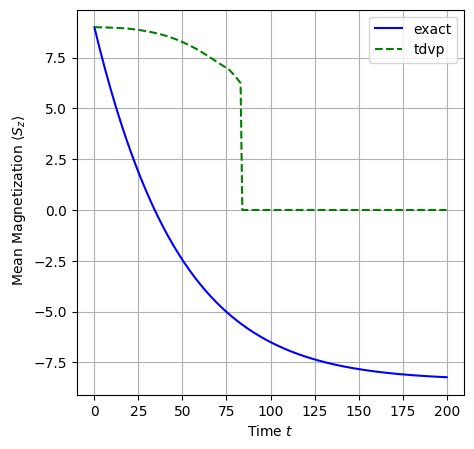

In [918]:
import matplotlib.pyplot as plt

fig1, axs1 = plt.subplots(1, 1, sharex=True, figsize=(5, 5))

colors = ['b', 'g', 'r', 'c', 'm', 'y']

# Plot imaginary parts
axs1.plot(magnetization_z, label="exact", color=colors[0])
axs1.plot( tdvp_ex1.operator_results()[0] , label="tdvp", color=colors[1], linestyle='--')
#axs1.plot( np.imag(tdvp_ex1.operator_results()[0]  ), label="tdvp", color=colors[1], linestyle='--')




# axs1.plot(results_N_ttn, label="N_ttn")
# axs1.plot(results_N_t3n, label="N_t3n")

axs1.set_xlabel("Time $t$")
axs1.set_ylabel(" Mean Magnetization $\\langle S_z \\rangle$")
axs1.grid(True)
axs1.legend()

C:\Users\edpou\AppData\Local\Temp\ipykernel_16948\2378592497.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab20')  # Choose a colormap with more distinct colors


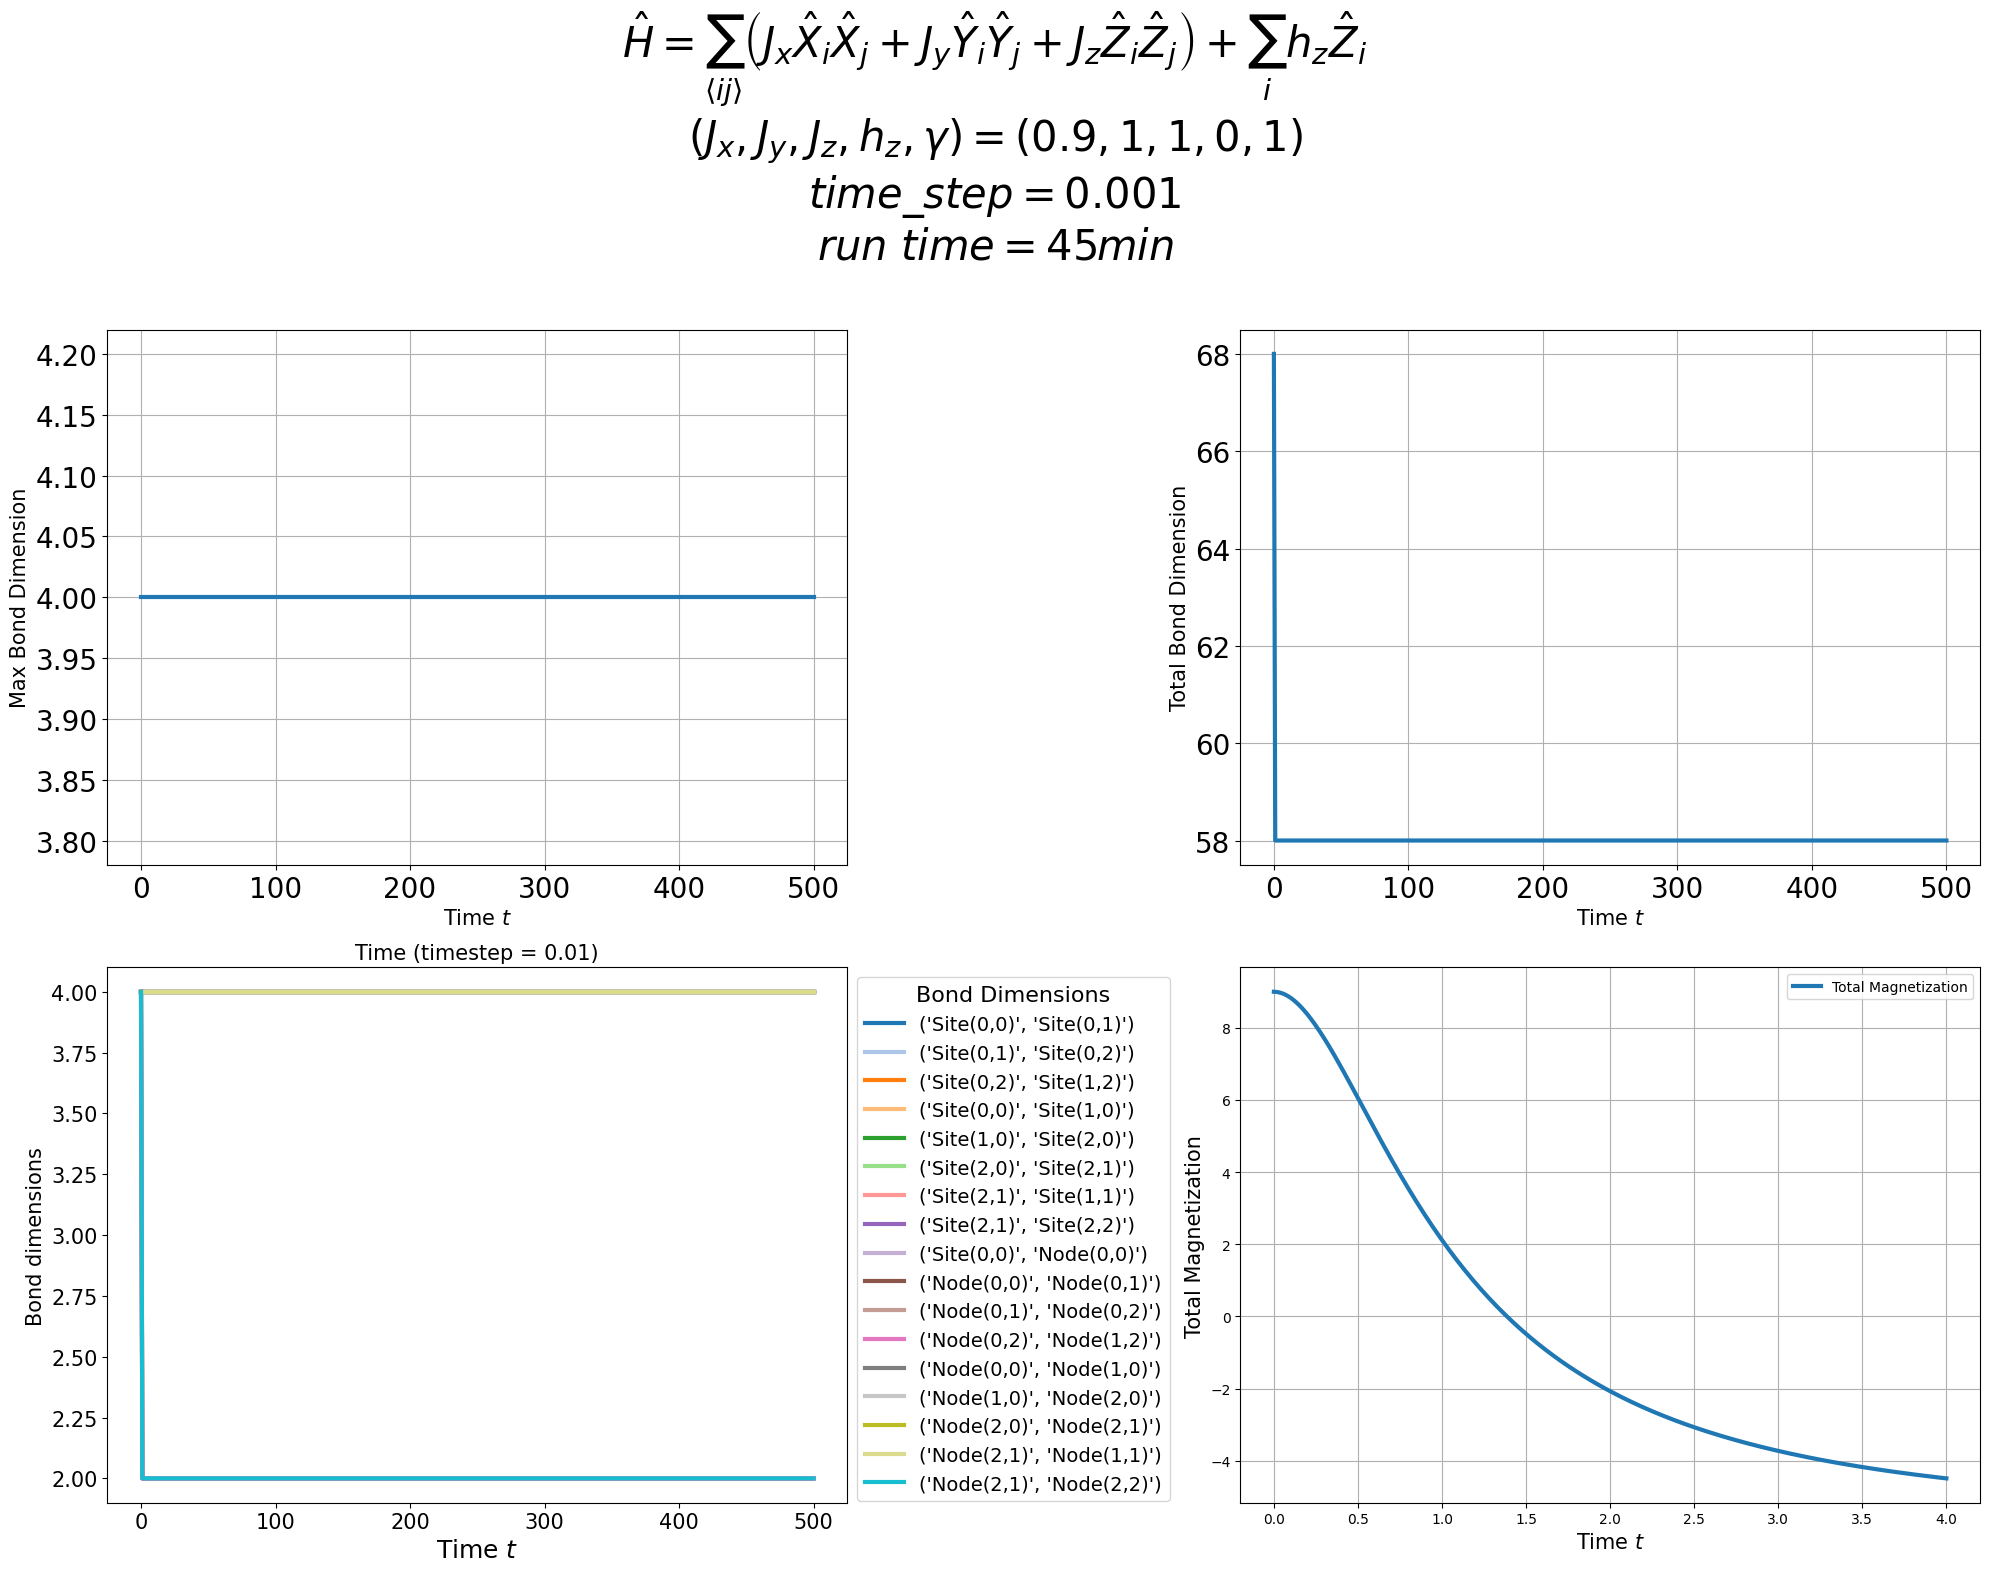

In [322]:
import matplotlib.pyplot as plt

def get_distinct_colors(n):
    """Generates a list of n distinct, visually appealing colors using colormap cyclically."""
    from matplotlib.cm import get_cmap
    cmap = get_cmap('tab20')  # Choose a colormap with more distinct colors
    return [cmap(i / n) for i in range(n)]

# Create a figure with a grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 16))

# Set a title for the entire figure
plt.suptitle(
    r'$\hat{H}=\sum_{\langle i j\rangle}\left(J_x \hat{X}_i \hat{X}_j+J_y \hat{Y}_i \hat{Y}_j+J_z \hat{Z}_i \hat{Z}_j\right)+\sum_i h_z \hat{Z}_i$' + '\n' + 
    r'$(J_x,J_y,J_z,h_z,\gamma) = (0.9, 1, 1, 0, 1) $' + '\n' +
    r'$time\_step = 0.001$' + '\n' +
    r'$run\ time = 45 min $',
    fontsize=30, y=0.98
)

# Plot max bond dimension
axs[0, 0].plot(tdvp_ex1.max_bond_dim, linewidth=3)
axs[0, 0].set_xlabel("Time $t$", fontsize=15)
axs[0, 0].set_ylabel('Max Bond Dimension', fontsize=15)
axs[0, 0].tick_params(axis='both', which='major', labelsize=20)
axs[0, 0].grid(True)

# Plot total bond dimension
axs[0, 1].plot(tdvp_ex1.total_bond_dim, linewidth=3)
axs[0, 1].set_xlabel("Time $t$", fontsize=15)
axs[0, 1].set_ylabel('Total Bond Dimension', fontsize=15)
axs[0, 1].tick_params(axis='both', which='major', labelsize=20)
axs[0, 1].grid(True)

# Plot bond dimensions for each key
colors = get_distinct_colors(len(tdvp_ex1.bond_dims))
for i, (key, values) in enumerate(tdvp_ex1.bond_dims.items()):
    x = list(range(len(values)))
    axs[1, 0].plot(x, values, label=key, color=colors[i], linewidth=3)
axs[1, 0].legend(title='Bond Dimensions', loc='upper left', bbox_to_anchor=(1, 1), fontsize=14, title_fontsize=16)
axs[1, 0].set_xlabel("Time $t$", fontsize=18)
axs[1, 0].set_ylabel('Bond dimensions', fontsize=15)
axs[1, 0].set_title('Time (timestep = 0.01)', fontsize=15)
axs[1, 0].tick_params(axis='both', which='major', labelsize=15)
plt.subplots_adjust(right=0.8)

# Plot results_M
axs[1, 1].plot(times , tdvp_ex1.operator_results()[0], label="Total Magnetization", linewidth=3)
axs[1, 1].set_xlabel("Time $t$", fontsize=15)
axs[1, 1].set_ylabel("Total Magnetization", fontsize=15)
axs[1, 1].grid(True)
axs[1, 1].legend()

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the title

# Show the plot
plt.show()


In [58]:
### (0, 0): (2, 2, 2) --> (2, 2, 2, 2)

shapes = {
    (0, 0): (2, 2, 2),
    (0, 1): (2, 2, 2),
    (0, 2): (2, 2, 2, 2),
    (0, 3): (2, 2),
    (1, 0): (2, 2),
    (1, 1): (2, 2, 2, 2),
    (1, 2): (2, 2, 2, 2),
    (1, 3): (2, 2),
    (2, 0): (2, 2),
    (2, 1): (2, 2, 2, 2),
    (2, 2): (2, 2, 2, 2),
    (2, 3): (2, 2),
    (3, 0): (2, 2),
    (3, 1): (2, 2, 2),
    (3, 2): (2, 2, 2, 2),
    (3, 3): (2, 2)
}

sites = {
    (i, j): ptn.random_tensor_node(shapes[(i, j)], identifier=f"Site({i},{j})") for i in range(4) for j in range(4)
}

ttn = ptn.TreeTensorNetworkState()

ttn.add_root(sites[(0, 0)][0], sites[(0, 0)][1])

connections = [
    ((0, 0), (0, 1), 0, 0),
    ((0, 1), (0, 2), 1, 0),
    ((0, 2), (0, 3), 1, 0),
    ((0, 2), (1, 2), 2, 0),
    ((1, 2), (1, 3), 1, 0),
    ((1, 2), (1, 1), 2, 0),
    ((1, 1), (1, 0), 1, 0),
    ((1, 1), (2, 1), 2, 0),
    ((2, 1), (2, 0), 1, 0),
    ((2, 1), (2, 2), 2, 0),
    ((2, 2), (2, 3), 1, 0),
    ((2, 2), (3, 2), 2, 0),
    ((3, 2), (3, 3), 1, 0),
    ((3, 2), (3, 1), 2, 0),
    ((3, 1), (3, 0), 1, 0),
    ]

for (parent, child, parent_leg, child_leg) in connections:
    parent_id = f"Site({parent[0]},{parent[1]})"
    child_id = f"Site({child[0]},{child[1]})"
    ttn.add_child_to_parent(sites[child][0], sites[child][1], child_leg, parent_id, parent_leg)

ttn = product_state(ttn , bond_dim= 4, physical_dim = 2)  

nodes = {
    (i, j): (ptn.Node(tensor=ttn.tensors[f"Site({i},{j})"].conj() , identifier=f"Node({i},{j})"), ttn.tensors[f"Site({i},{j})"].conj()) for i in range(4) for j in range(4)
}

ttn.add_child_to_parent(nodes[(0,0)][0], nodes[(0,0)][1], 1, "Site(0,0)", 1)

### (0,0) : 0,1 --> 1,2

connections = [
    ((0, 0), (0, 1), 1, 0),
    ((0, 1), (0, 2), 1, 0),
    ((0, 2), (0, 3), 1, 0),
    ((0, 2), (1, 2), 2, 0),
    ((1, 2), (1, 3), 1, 0),
    ((1, 2), (1, 1), 2, 0),
    ((1, 1), (1, 0), 1, 0),
    ((1, 1), (2, 1), 2, 0),
    ((2, 1), (2, 0), 1, 0),
    ((2, 1), (2, 2), 2, 0),
    ((2, 2), (2, 3), 1, 0),
    ((2, 2), (3, 2), 2, 0),
    ((3, 2), (3, 3), 1, 0),
    ((3, 2), (3, 1), 2, 0),
    ((3, 1), (3, 0), 1, 0),
    ]

for (parent, child, parent_leg, child_leg) in connections:
    parent_id = f"Node({parent[0]},{parent[1]})"
    child_id = f"Node({child[0]},{child[1]})"
    ttn.add_child_to_parent(nodes[child][0], nodes[child][1], child_leg, parent_id, parent_leg)